In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.colors as mcolors
%matplotlib inline
from collections import defaultdict
import re
import pandas as pd
import unicodedata
import numpy as np

In [2]:

import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
                  "(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Find all tables with class "wikitable"
tables = soup.find_all("table", {"class": "wikitable"})
if not tables:
    raise ValueError("No wikitable found on the Wikipedia page!")

# Select the first table
table = tables[0]
rows = table.find_all("tr")

# Extract and prepare data
data = []
for row in rows[1:]:  # skip header row
    cells = row.find_all(["td", "th"])
    # Get clean text with whitespace and non-breaking spaces replaced
    cell_values = [cell.get_text(separator="\n", strip=True).replace('\xa0', ' ') for cell in cells]
    # Extract exactly first 6 columns (Date, Prison name, Country, Succeeded, Escapee(s), Details)
    data.append(cell_values[:6])

# Define headers explicitly
columns = ["Date", "Prison name", "Country", "Succeeded", "Escapee(s)", "Details"]

# Output first two rows for verification (as requested)
print("Header:")
print(columns)
print("\nAll rows of Data:")
for row in data:
    print(row)

Header:
['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details']

All rows of Data:
['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan\nCarlos Antonio Contreras Castro', "Kaplan was a\nNew York\nbusinessman who had been arrested for murder in 1962 in\nMexico City\nand was incarcerated at the Santa Martha Acatitla prison in the\nIztapalapa\nborough. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on the aforementioned date, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Contreras, a\nVenezuelan\ncounterfeiter, were able to board the craft and were piloted away, before any shots were fired.\n[\n10\n]\nBoth men were flown to\nTexas\nand then different planes flew Kaplan to\nCalifornia\nand Contreras to\nGuatemala\n.\n[\n3\n]\nThe Mexican government never initiated extradition proceedings against Kaplan.\n[\n10\n]\nThe escape is 

In [3]:
df = pd.DataFrame(data, columns=columns)

# Remove the 'Details' column for main analysis
df = df[["Date", "Prison name", "Country", "Succeeded", "Escapee(s)"]]

In [4]:
def extract_year(date_str):
    try:
        return int(date_str[-4:])
    except Exception:
        return None

df['Year'] = df['Date'].apply(extract_year)

In [5]:
# extract month and weekday for more detailed analysis
import datetime

def extract_month(date_str):
    try:
        dt = pd.to_datetime(date_str, errors='coerce')
        return dt.month
    except Exception:
        return None

def extract_weekday(date_str):
    try:
        dt = pd.to_datetime(date_str, errors='coerce')
        if pd.isnull(dt):
            return None
        return dt.strftime('%A')
    except Exception:
        return None

df['Month'] = df['Date'].apply(extract_month)
df['Weekday'] = df['Date'].apply(extract_weekday)

In [6]:
# Frequency of escapes by year
escapes_per_year = df['Year'].value_counts().sort_index()
print("Number of escapes per year:")
print(escapes_per_year)

Number of escapes per year:
Year
1971    1
1973    1
1978    1
1981    2
1983    1
1985    2
1986    3
1987    1
1988    3
1989    2
1990    1
1991    1
1992    2
1993    1
1996    1
1997    1
1999    1
2000    2
2001    3
2002    2
2003    1
2005    2
2006    1
2007    3
2009    3
2010    1
2012    1
2013    2
2014    1
2016    1
2018    1
2020    1
Name: count, dtype: int64


In [7]:
# Occurrence by day of week
weekday_counts = df['Weekday'].value_counts()
print("Escapes by day of the week:")
print(weekday_counts)

# Occurrence by month
month_counts = df['Month'].value_counts().sort_index()
print("Escapes by month:")
print(month_counts)

Escapes by day of the week:
Weekday
Thursday     10
Monday       10
Sunday        9
Friday        7
Tuesday       5
Saturday      5
Wednesday     4
Name: count, dtype: int64
Escapes by month:
Month
1     3
2     5
3     4
4     5
5     4
6     6
7     5
8     3
9     2
10    2
11    2
12    9
Name: count, dtype: int64


In [8]:
# Escapes by country
country_counts = df['Country'].value_counts()
print("Number of escapes per country:")
print(country_counts)

Number of escapes per country:
Country
France            15
United States      8
Canada             4
Belgium            4
Greece             4
United Kingdom     2
Brazil             2
Australia          2
Colombia           2
Italy              1
Ireland            1
Mexico             1
Chile              1
Puerto Rico        1
Netherlands        1
Russia             1
Name: count, dtype: int64


Escapes per Year:
Year
1971    1
1973    1
1978    1
1981    2
1983    1
1985    2
1986    3
1987    1
1988    3
1989    2
1990    1
1991    1
1992    2
1993    1
1996    1
1997    1
1999    1
2000    2
2001    3
2002    2
2003    1
2005    2
2006    1
2007    3
2009    3
2010    1
2012    1
2013    2
2014    1
2016    1
2018    1
2020    1
Name: count, dtype: int64


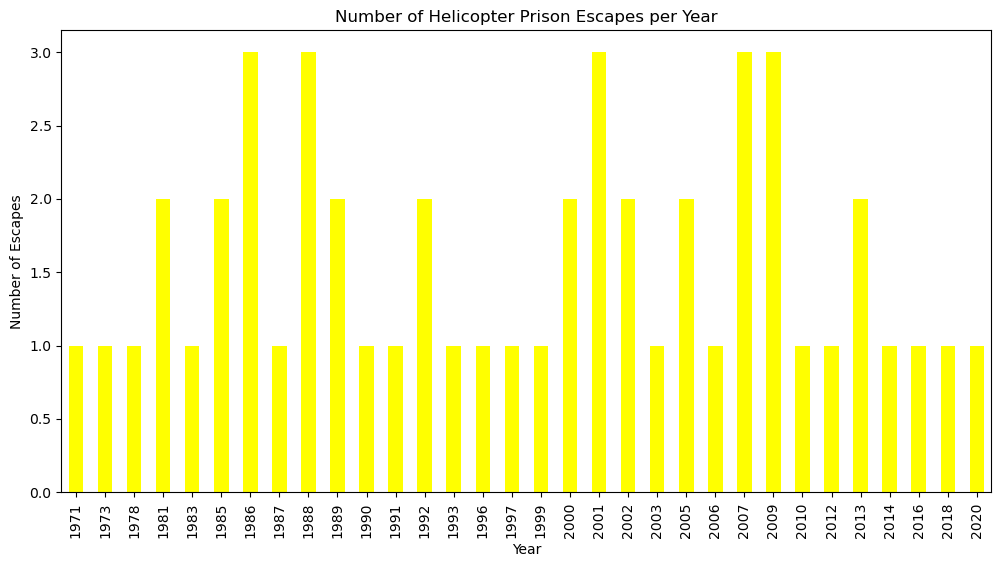

In [10]:
# Temporal Analysis

escapes_per_year = df['Year'].value_counts().sort_index()
print("Escapes per Year:")
print(escapes_per_year)

plt.figure(figsize=(12,6))
escapes_per_year.plot(kind='bar', color='yellow')
plt.title('Number of Helicopter Prison Escapes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Escapes')
plt.show()


Escapes per Month:
Month
12    9
6     6
2     5
4     5
7     5
3     4
5     4
8     3
1     3
10    2
11    2
9     2
Name: count, dtype: int64


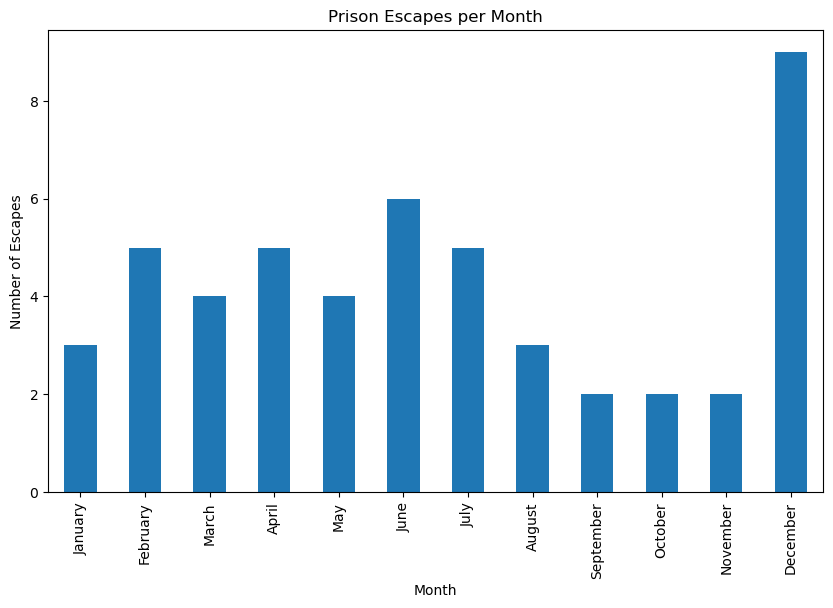

In [12]:
# Plot the number of prison escapes per month
month_counts = df['Month'].value_counts()
print("\nEscapes per Month:")
print(month_counts)
month_counts = df['Month'].value_counts().sort_index()
month_names = {i: name for i, name in enumerate(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 1)}
month_counts.index = month_counts.index.map(month_names)
month_counts.plot(kind='bar', figsize=(10, 6), xlabel='Month', ylabel='Number of Escapes',
                  title='Prison Escapes per Month')

plt.show()


Escapes per Day of the Week:
Weekday
Thursday     10
Monday       10
Sunday        9
Friday        7
Tuesday       5
Saturday      5
Wednesday     4
Name: count, dtype: int64


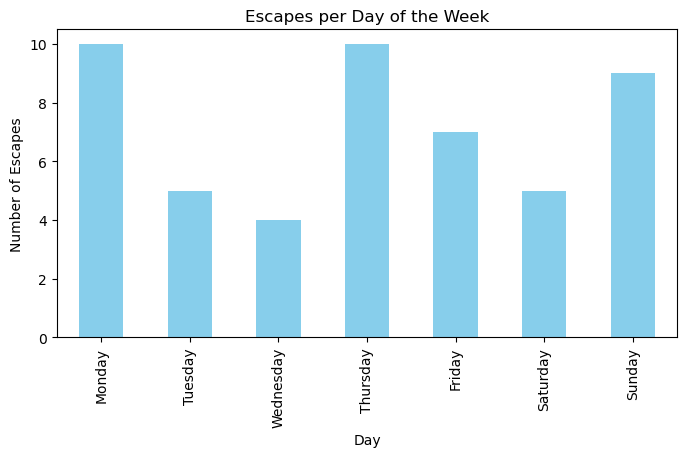

In [11]:
weekday_counts = df['Weekday'].value_counts()
print("\nEscapes per Day of the Week:")
print(weekday_counts)

plt.figure(figsize=(8,4))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.reindex(weekday_order).plot(kind='bar', color='skyblue')
plt.title('Escapes per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Escapes')
plt.show()


Escapes per Country:
Country
France            15
United States      8
Canada             4
Belgium            4
Greece             4
United Kingdom     2
Brazil             2
Australia          2
Colombia           2
Italy              1
Ireland            1
Mexico             1
Chile              1
Puerto Rico        1
Netherlands        1
Russia             1
Name: count, dtype: int64


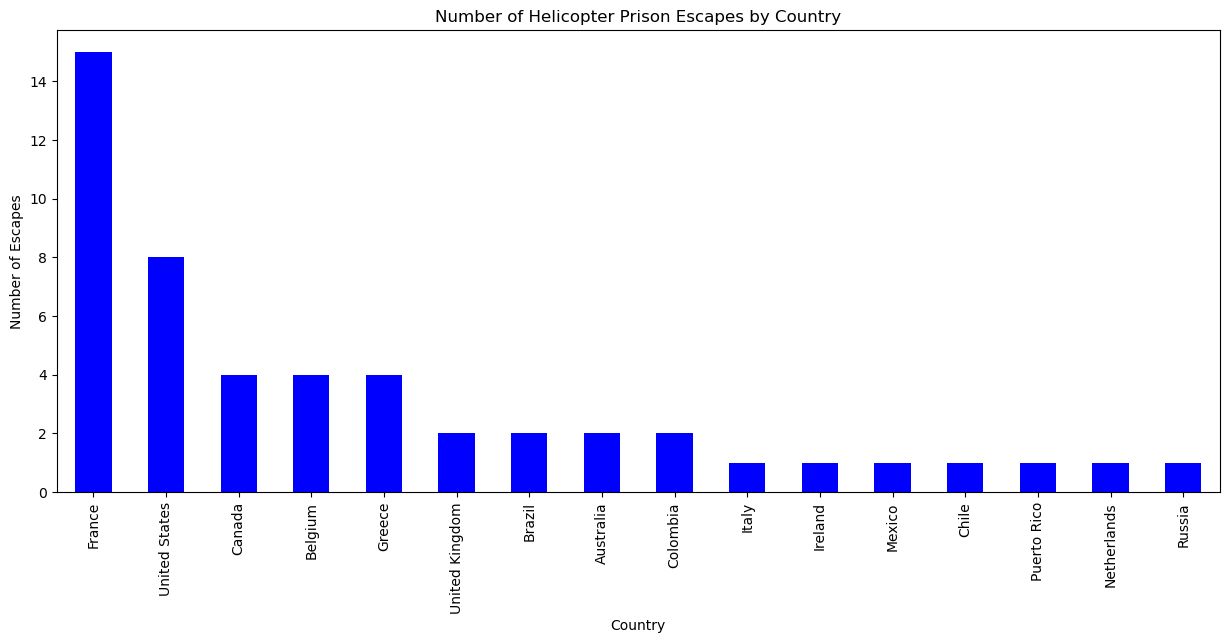

In [13]:
# Geographical Analysis
country_counts = df['Country'].value_counts()
print("\nEscapes per Country:")
print(country_counts)

plt.figure(figsize=(15,6))
country_counts.plot(kind='bar', color='blue')
plt.title('Number of Helicopter Prison Escapes by Country')
plt.xlabel('Country')
plt.ylabel('Number of Escapes')
plt.show()


Overall Success Rate of Helicopter Escapes: 72.00%

Count of Success vs Failure:
Succeeded
Yes    36
No     14
Name: count, dtype: int64


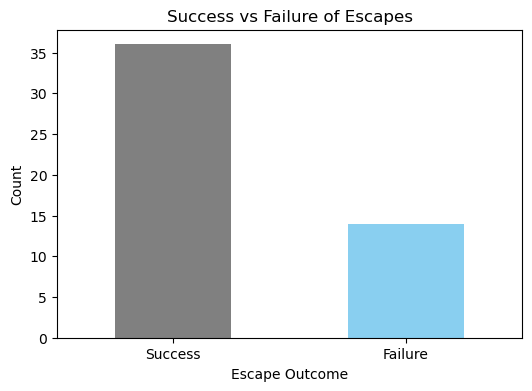

In [17]:
# Successive Analysis
# Convert 'Succeeded' column to numeric: 'Yes' -> 1, 'No' -> 0
df['Succeeded_numeric'] = df['Succeeded'].map({'Yes': 1, 'No': 0})

success_rate = df['Succeeded_numeric'].mean()
print(f"\nOverall Success Rate of Helicopter Escapes: {success_rate:.2%}")

success_counts = df['Succeeded'].value_counts()
print("\nCount of Success vs Failure:")
print(success_counts)

plt.figure(figsize=(6,4))
success_counts.plot(kind='bar', color=['grey', '#89CFF0'])
plt.title("Success vs Failure of Escapes")
plt.xlabel("Escape Outcome")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Success', 'Failure'], rotation=0)
plt.show()

In [18]:
# 1. Calculate the average number of escapees per incident
average_escapees = df['Escapee(s)'].str.count(',').fillna(0) + 1
average_escapees_mean = average_escapees.mean()

print("Average Number of Escapees per Incident:")
print(f"{average_escapees_mean:.2f}\n")

print("Observation: It seems an average of roughly 2 inmates are involved in any escape plan.\n")


Average Number of Escapees per Incident:
1.02

Observation: It seems an average of roughly 2 inmates are involved in any escape plan.



In [19]:
# 2. Identify hardened escape inmates who attempted multiple helicopter escapes

# Filter to rows with non-null 'Escapee(s)'
escaped_individuals = df[df['Escapee(s)'].notnull()]

# Split the 'Escapee(s)' column into individual names
individual_escapees = escaped_individuals['Escapee(s)'].str.split(',')

# Flatten the list of all individual escapees
all_escapees = []
for escapees in individual_escapees:
    all_escapees.extend([name.strip() for name in escapees])

# Count occurrences of each escapee
escapee_counts = pd.Series(all_escapees).value_counts()

# Filter for escapees with multiple escape attempts
persistent_escapees = escapee_counts[escapee_counts > 1]

print("Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:")
print(persistent_escapees, '\n')


Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:
—                 8
Michel Vaujour    2
Pascal Payet      2
Name: count, dtype: int64 



In [20]:
# 3. Display details of recurrent escapees

# List of repeated escapee names for filtering
repeated_escapees = persistent_escapees.index.tolist()

# Helper function to check if any repeated escapee name is in cell
def escapee_found_in_cell(cell):
    if pd.isnull(cell):
        return False
    cell_names = [name.strip() for name in cell.split(',')]
    return any(name in repeated_escapees for name in cell_names)

# Drop rows with NaN in 'Escapee(s)' and copy to temporary DataFrame
temporary_df = df.dropna(subset=['Escapee(s)']).copy()

# Filter rows where 'Escapee(s)' contains any repeated escapee
duplicated_df = temporary_df[temporary_df['Escapee(s)'].apply(escapee_found_in_cell)]

# Rename 'Prison' column to 'Prison name'
duplicated_df = duplicated_df.rename(columns={'Prison': 'Prison name'})

# Select and order relevant columns
column_order = ['Escapee(s)', 'Succeeded', 'Prison name', 'Date', 'Country']
duplicated_df = duplicated_df.reindex(columns=column_order)

print("The Unstoppable: Recurrent Escapees")
print(duplicated_df.to_string(index=False))


The Unstoppable: Recurrent Escapees
    Escapee(s) Succeeded                           Prison name               Date     Country
Michel Vaujour       Yes                    Prison de la Santé       May 26, 1986      France
             —       Yes Cárcel Bellavista,\nBello\n, Colombia  December 23, 1988    Colombia
             —       Yes                          Lyon\nPrison  February 24, 1992      France
             —        No      Touraine\nCentral Prison,\nTours      December 1992      France
Michel Vaujour        No      Touraine\nCentral Prison,\nTours      June 17, 1993      France
             —        No                   De Geerhorst prison September 18, 1997 Netherlands
             —       Yes                          Lyon\nprison  December 13, 2000      France
  Pascal Payet       Yes                         Luynes prison   January 19, 2001      France
             —        No                        Fresnes prison       May 28, 2001      France
             —       Yes


Average Number of Escapees per Incident: 3.82


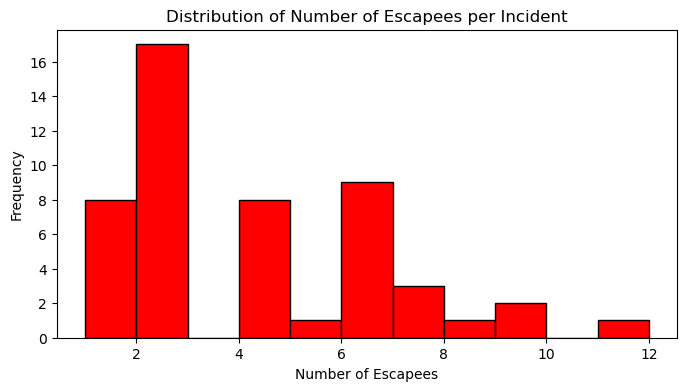

In [21]:
# Escape Analysis
def count_escapees(escapees_str):
    if pd.isnull(escapees_str):
        return 0
    names = list(filter(None, re.split(r'\s|,|;|and', escapees_str)))
    return len(names)

df['NumEscapees'] = df['Escapee(s)'].apply(count_escapees)
average_escapees = df['NumEscapees'].mean()
print(f"\nAverage Number of Escapees per Incident: {average_escapees:.2f}")

plt.figure(figsize=(8,4))
df['NumEscapees'].plot(kind='hist', bins=range(1, df['NumEscapees'].max() + 2), color='red', edgecolor='black')
plt.title('Distribution of Number of Escapees per Incident')
plt.xlabel('Number of Escapees')
plt.ylabel('Frequency')
plt.show()

In [16]:
from collections import Counter

# Hardened escapees (multiple mentions)
escapee_names = []
for entry in df['Escapee(s)'].fillna(''):
    cleaned = re.sub(r"[^\w\s'-]", "", entry)
    names = cleaned.split()
    escapee_names.extend(names)

name_counts = Counter(escapee_names)
hardened_escapees = {name: count for name, count in name_counts.items() if count > 1 and len(name) > 3}

print("\nHardened Escapee Inmates (multiple mentions):")
for name, count in hardened_escapees.items():
    print(f"{name}: {count}")


Hardened Escapee Inmates (multiple mentions):
David: 3
Carlos: 2
James: 2
William: 2
Michel: 4
Vaujour: 2
John: 2
Danny: 2
Muñoz: 2
Rodriguez: 2
Pascal: 2
Payet: 2
Jose: 2
Diaz: 2
Eric: 2
Paleokostas: 2
Alket: 2
Rizai: 2
Denis: 2
